Packages for data analysis and visualization:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option('display.max_columns', None)

# Predicting churn with logistic regression. Data setup & visuals included.


Quick view of the data and features:

In [2]:
# Load the data
df = pd.read_csv('customer_data.csv')

# Print the first few rows of the DataFrame to check
df.head()

,Customer_ID,Company_Name,Industry,Segment,Company_Revenue,ARR,Contract_Value,Product_Features_Used,Usage_Frequency,Data_Usage,License_Count,Last_Activity_Date,Engagement_Score,NPS_Score,Support_Requests,Average_Response_Time,Resolution_Time,Health_Score,Churn_Risk_Score,Renewal_Date,CSAT_Score,Customer_Feedback,Upsell_Opportunity,Referral_Count,Custom_Features,API_Calls,Churned,CSM,Days_since_last_activity,Contract_Start_Date,Contract_length
0,1,Company_1,Finance,Strategic,3250225,11625,8026,3,Daily,8,11,2021-01-07,46.0,-24,1,7,15.000000,89.0,40,2025-02-21,73,Negative,False,0,1,11,False,CSM_Str_7,724,2023-07-20,582
1,2,Company_2,Manufacturing,Emerging,56394,10024,4944,4,Daily,6,12,2021-01-04,6.0,-2,3,16,26.655918,23.0,42,2020-01-01,2,Neutral,False,2,0,10,True,CSM_Eme_17,727,2018-11-12,415
2,3,Company_3,Education,Mid-Market,3654,11088,553,0,Monthly,11,13,2021-01-02,34.5,-94,7,12,38.793407,30.0,94,2020-01-02,85,Positive,False,2,0,11,True,CSM_Mid_2,729,2019-03-23,285
3,4,Company_4,Manufacturing,Enterprise,341292,486,10925,2,Weekly,8,5,2021-01-03,81.0,-15,1,13,14.000000,84.0,53,2024-07-07,26,Positive,False,0,0,10,False,CSM_Ent_6,728,2023-11-26,224
4,5,Company_5,Manufacturing,Mid-Market,177870,570,12471,7,Weekly,3,9,2021-01-02,37.0,-47,0,14,17.000000,63.0,63,2042-03-31,68,Negative,False,1,2,9,False,CSM_Mid_7,729,2041-06-27,277


Selecting features and target (churn). I chose the features that are catered to churn or not churn just to create a good looking result. Realistically it may not turn out as nice, but analysis comes along with that when the time comes as well.

In [5]:
# Select features and target
X = df.drop('Churned', axis=1)
y = df['Churned']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a transformer that only scales continuous variables and onehotencodes categorical variables
ct = ColumnTransformer([
    ("scale", StandardScaler(), ['ARR', 'Company_Revenue', 'Engagement_Score', 
                                 'Support_Requests', 'Resolution_Time']),  # Scaling continuous features
    ("onehot", OneHotEncoder(), ['Segment'])  # Encoding categorical feature segment
], remainder='drop')

# fit & transform the training data
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


Fitting the model based on the training data, at the moment only doing a single test/train split. Realistically would want to use K-Fold means to create more diverse scenarios

In [7]:
# Create and fit the logistic regression model
LM_model = LogisticRegression()
LM_model.fit(X_train, y_train)

# Predict on the test set
predictions = LM_model.predict(X_test)

Feature importance of our model, a good model give you deep insights on how valuable each feature can be. Here we see the most impact on churning through high resolution times and many support requests. Being in the 'emerging' segment seems to tilt a customer towards churning, this could be because of resource allocation, behavior, etc. 

Revenue and ARR had little impact on this model, and high engagement scores impactful in providing a False for 'Churned' (Which is good). This also reinforces our previous findings that being a Strategic account gives less of a chance to churn. This could be to sticky contracts, resource allocation, behavior etc. 



                      Feature  Importance
2     scale__Engagement_Score   -1.308885
8   onehot__Segment_Strategic   -0.335279
6  onehot__Segment_Enterprise   -0.150318
7  onehot__Segment_Mid-Market   -0.083963
0                  scale__ARR   -0.040428
1      scale__Company_Revenue    0.002022
5    onehot__Segment_Emerging    0.503766
3     scale__Support_Requests    1.144334
4      scale__Resolution_Time    2.084276


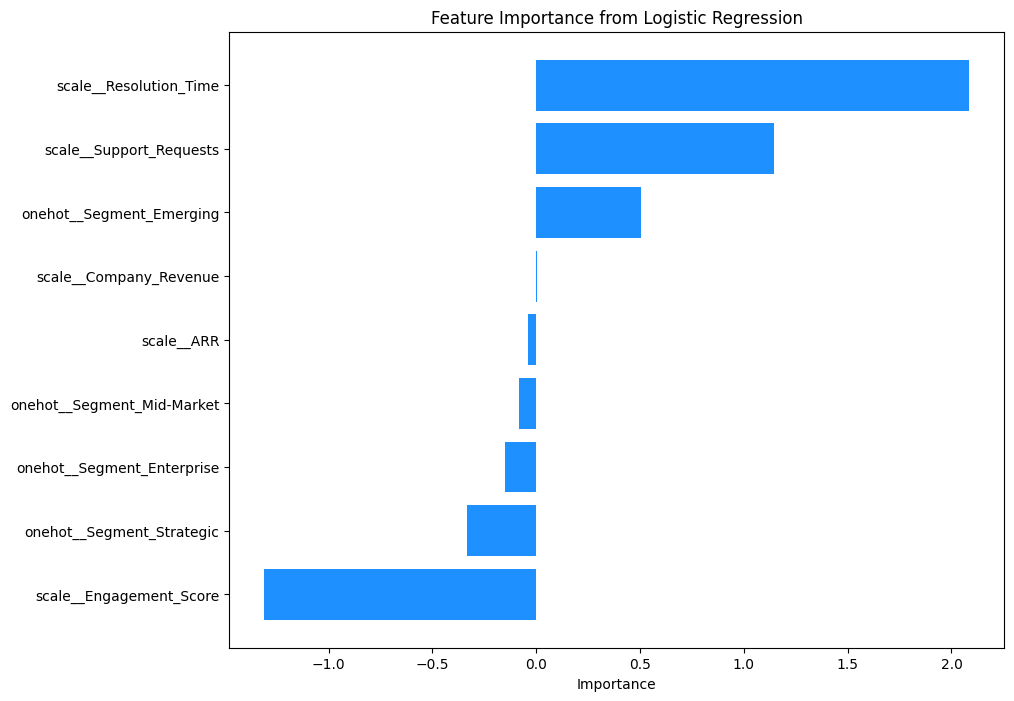

In [38]:
feature_importance = LM_model.coef_[0]
feats = ct.get_feature_names_out()  # Adjust this if using a different method to get feature names

importance_df = pd.DataFrame({'Feature': feats, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=True)

print(importance_df)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Logistic Regression')
plt.show()

Below are some metrics we can evaluate models on:

In [29]:
# Accuracy
acc_score = accuracy_score(y_test, predictions)
print("Accuracy:", acc_score, '\n \n ')

# Confusion Matrix
matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix: \n", matrix, '\n  \n ')

# Classification Report
report = classification_report(y_test, predictions)
print("Classification Report:  \n", report)


Accuracy: 0.922 
 
 
Confusion Matrix: 
 [[1572   55]
 [ 101  272]] 
  
 
Classification Report:  
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      1627
        True       0.83      0.73      0.78       373

    accuracy                           0.92      2000
   macro avg       0.89      0.85      0.86      2000
weighted avg       0.92      0.92      0.92      2000



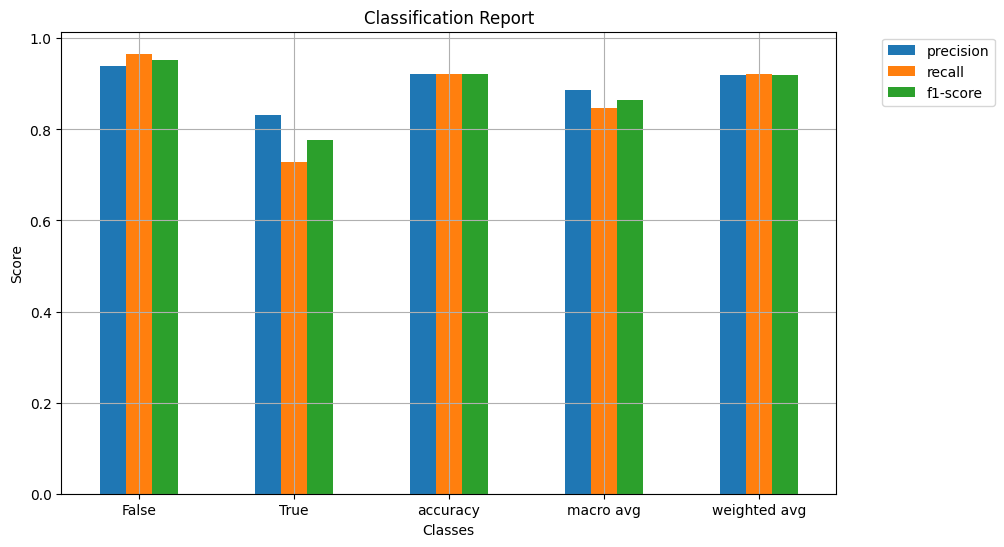

In [33]:
reports = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(reports).transpose()
report_df.drop('support', axis=1, inplace=True)
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


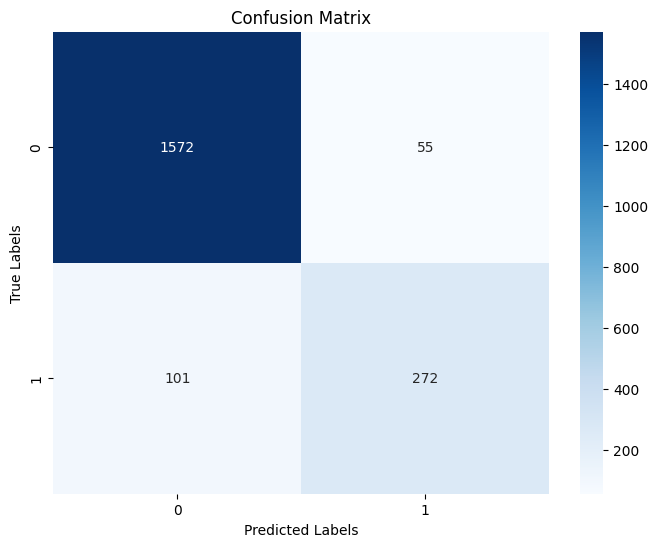

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()